In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package  #Dataset link
weather_df = pd.read_csv('weatherAUS.csv')
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# EDA

In [3]:
weather_df.shape

(145460, 23)

In [4]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
weather_df.dropna(subset=['RainToday', 'RainTomorrow'],inplace=True)

In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [7]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [8]:
num_cols = weather_df.select_dtypes(np.number).columns.to_list()
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

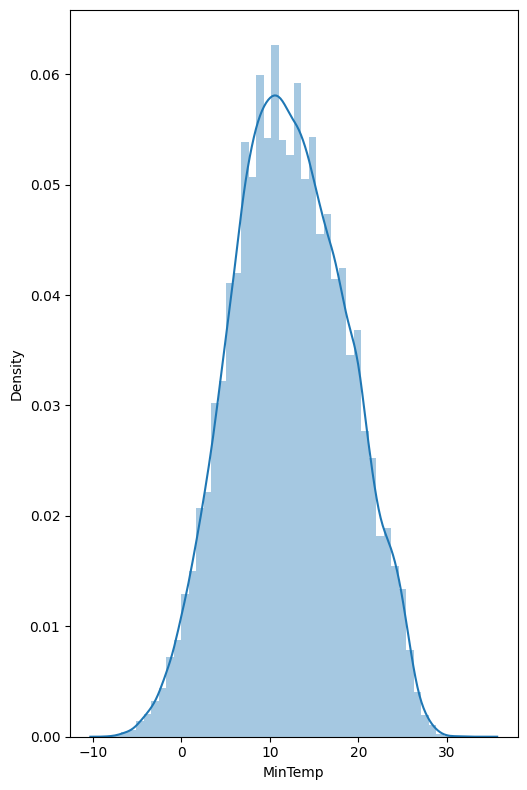

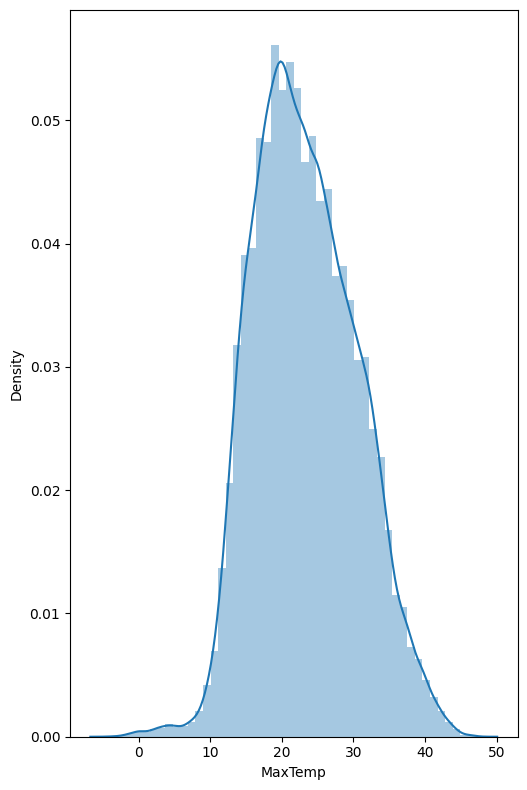

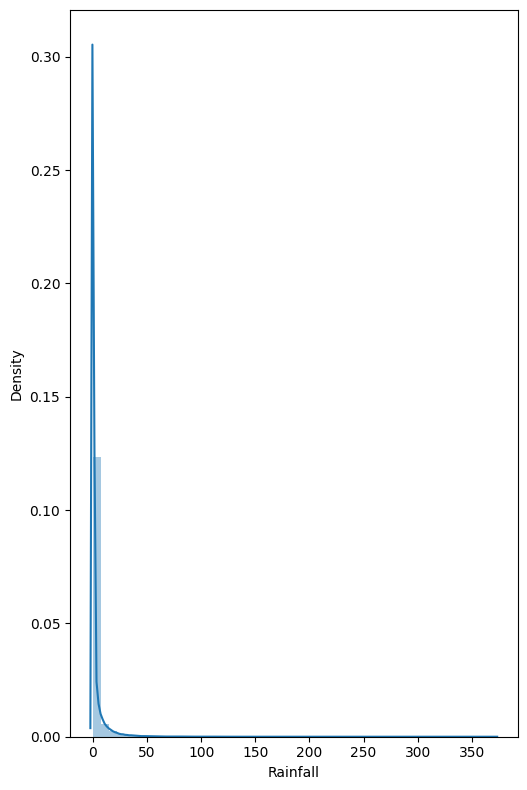

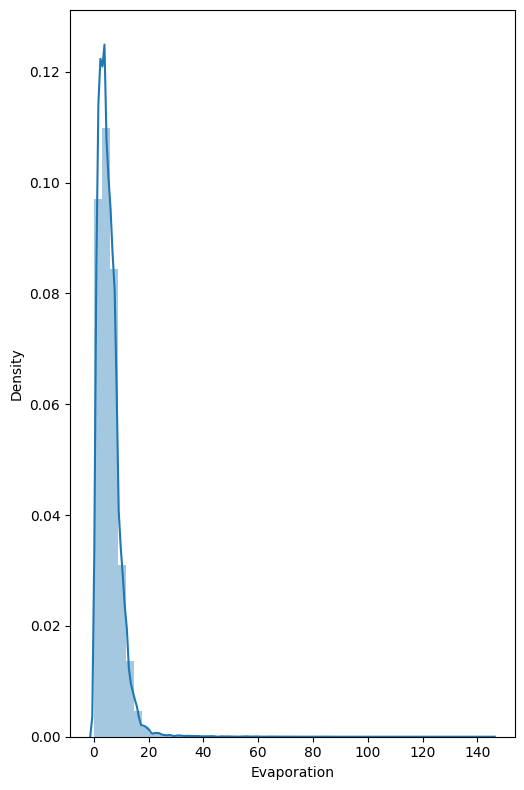

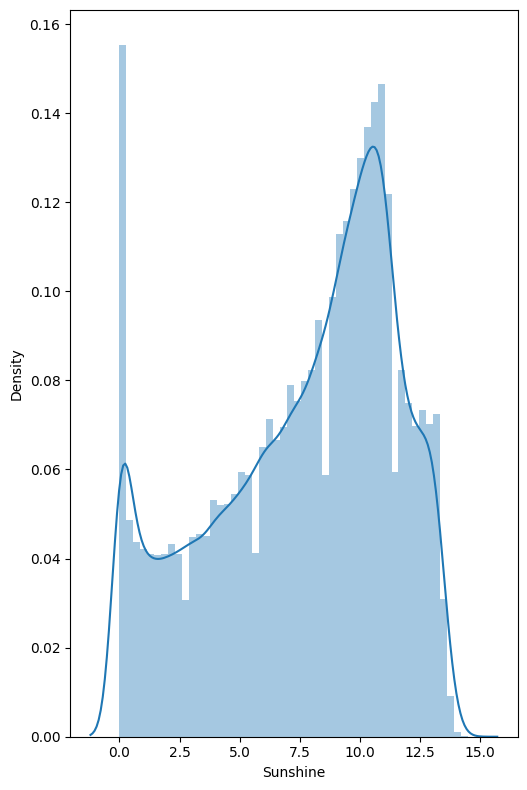

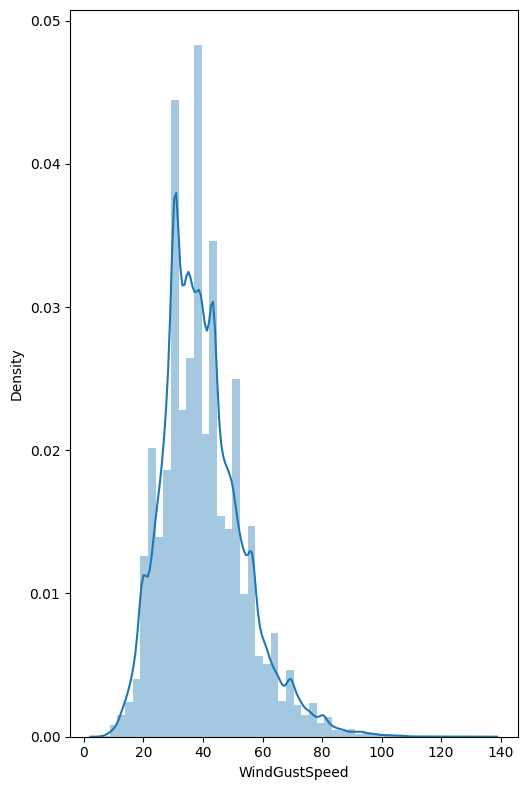

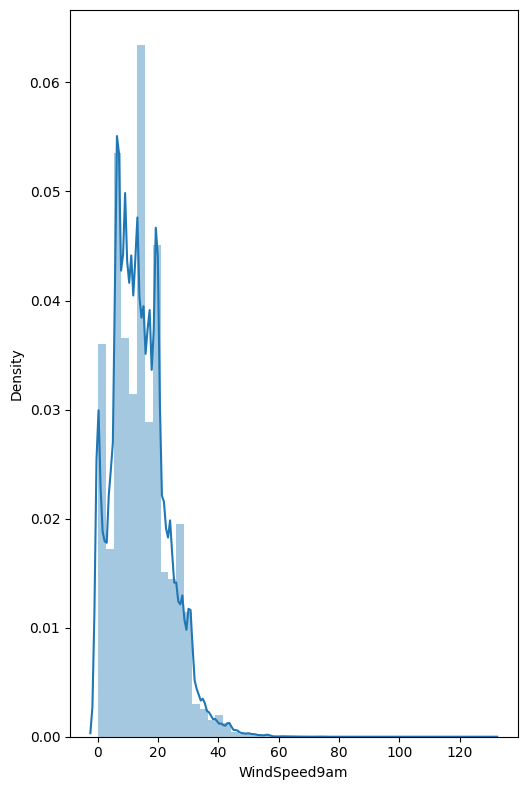

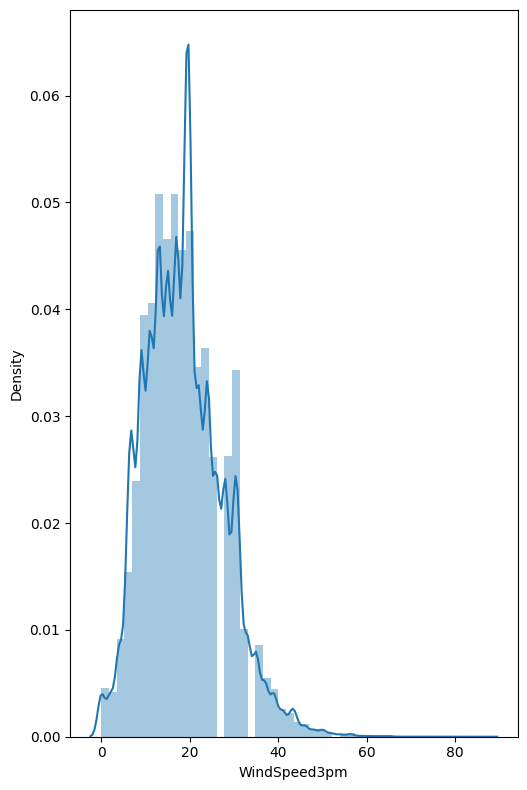

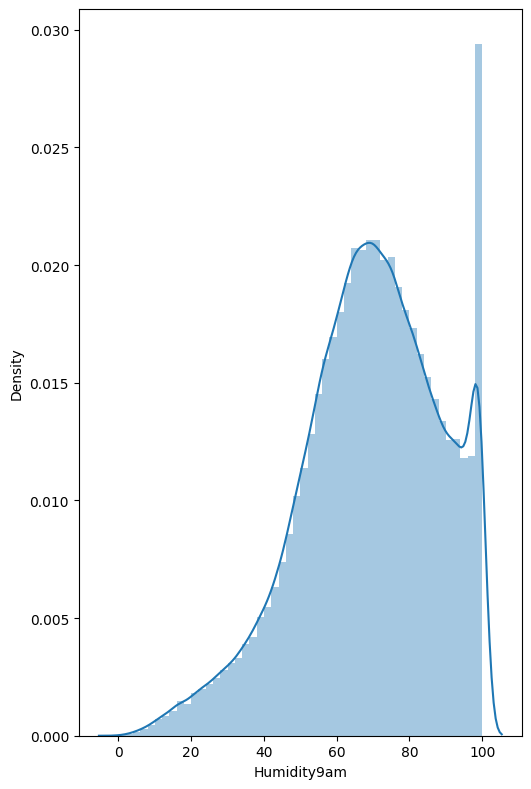

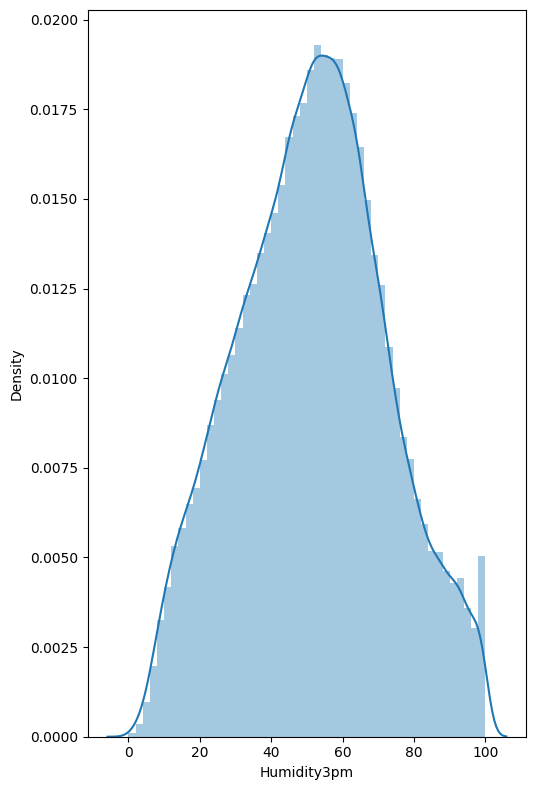

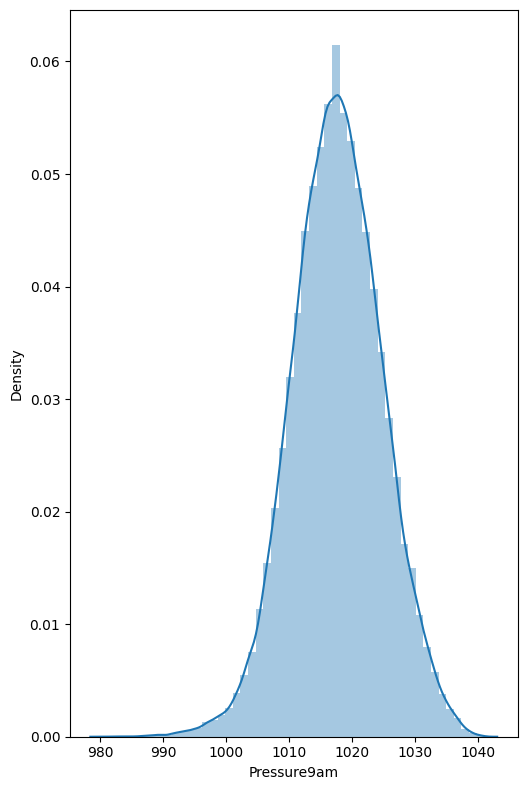

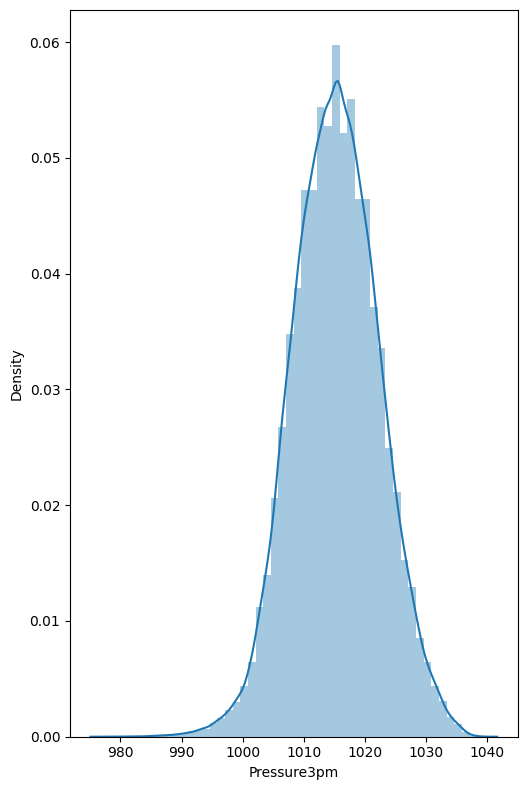

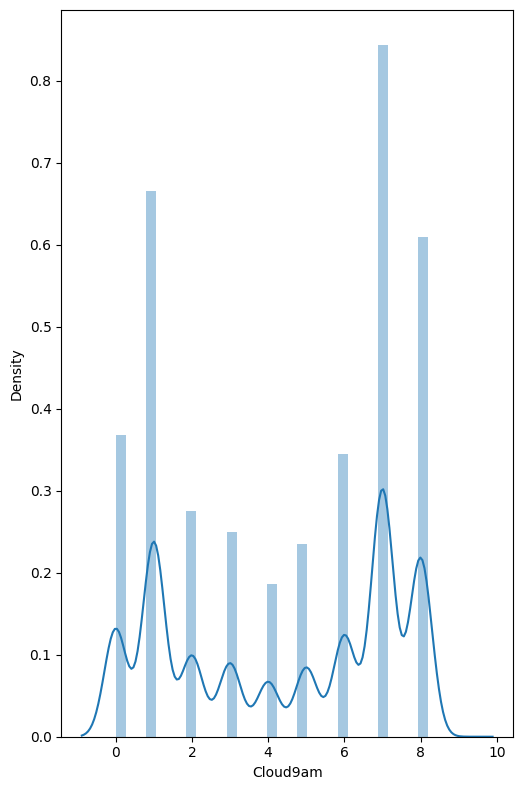

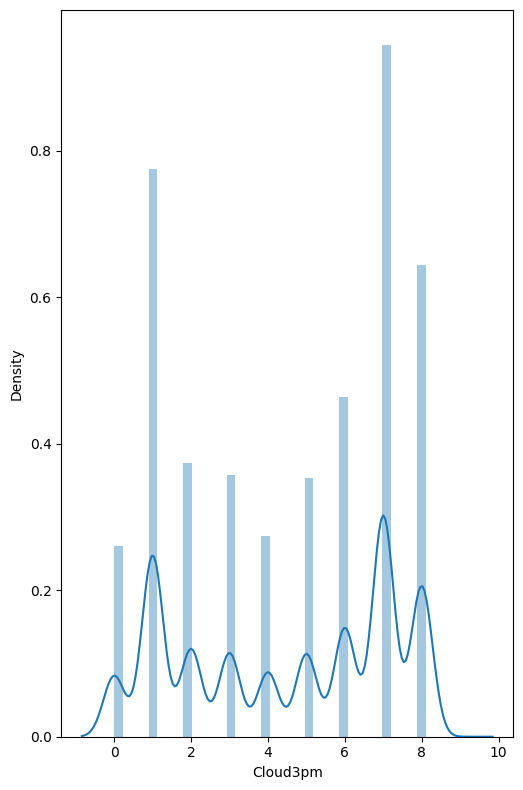

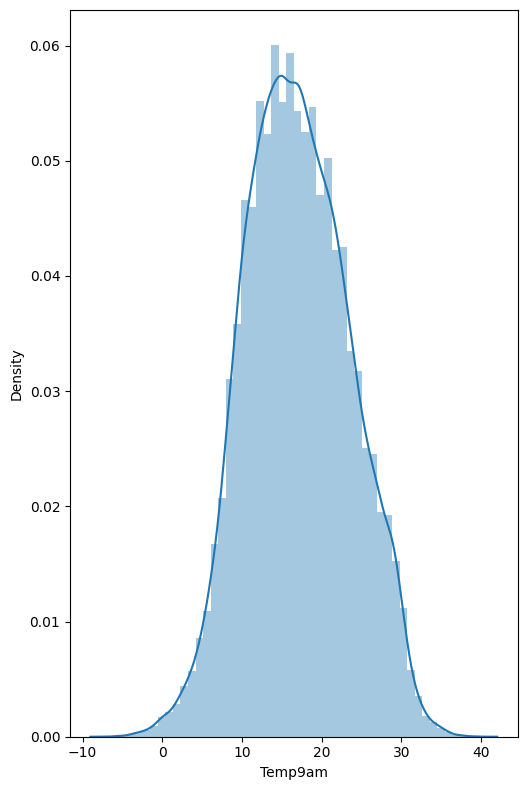

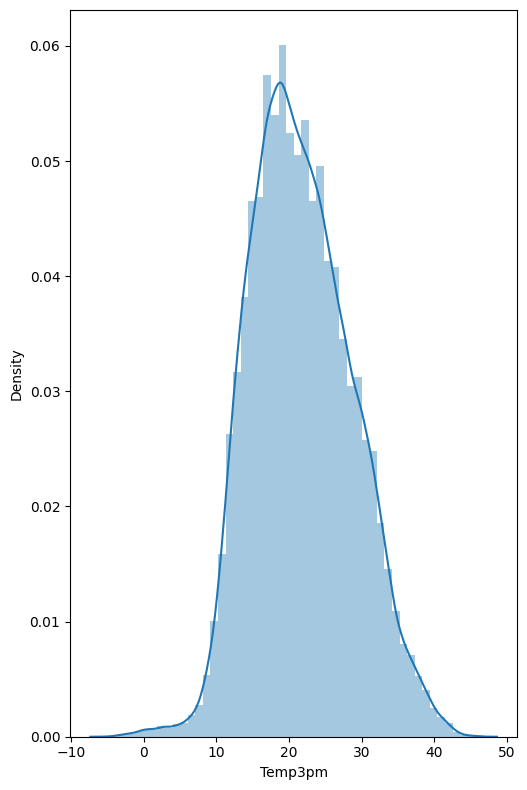

In [9]:
#plotting distribution of numeric columns
for col in weather_df[num_cols]:
    f = plt.figure(figsize=(10,8))
    ax = f.add_subplot(1,2,2)
    sns.distplot(weather_df[col])
    plt.tight_layout()
    plt.show()

In [10]:
weather_df[num_cols].isnull().sum()

,0
MinTemp,468
MaxTemp,307
Rainfall,0
Evaporation,59694
Sunshine,66805
WindGustSpeed,9105
WindSpeed9am,1055
WindSpeed3pm,2531
Humidity9am,1517
Humidity3pm,3501


In [11]:
#percentage of missing value
(weather_df[num_cols].isnull().sum() / len(weather_df)) * 100

,0
MinTemp,0.332417
MaxTemp,0.218060
Rainfall,0.000000
Evaporation,42.400222
Sunshine,47.451114
WindGustSpeed,6.467216
WindSpeed9am,0.749359
WindSpeed3pm,1.797751
Humidity9am,1.077514
Humidity3pm,2.486735


In [12]:
#creating a copy of original df
df = weather_df.copy()

# Preprocessing

In [13]:
# Imputation would be done by mean[] as their missing percentage is under 10% and have more of normal distribution
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
si.fit(df[['MinTemp', 'MaxTemp' , 'Humidity3pm', 'Pressure9am', 'Pressure3pm' , 'Temp9am', 'Temp3pm']])
df[['MinTemp', 'MaxTemp' , 'Humidity3pm',
   'Pressure9am', 'Pressure3pm' , 'Temp9am','Temp3pm']] = si.transform(df[['MinTemp', 'MaxTemp' , 'Humidity3pm', 'Pressure9am',
                                                                                         'Pressure3pm' , 'Temp9am', 'Temp3pm']])

In [14]:
# Imputation would be done by IQR Proximity (End of Distribution) as their distribution is skewed
import random
def iqr(df):
    IQR = (df.quantile(.75)) - (df.quantile(.25))
    upper_limit = df.mean() + (1.5 * IQR)
    lower_limit = df.mean() - (1.5 * IQR)
    df = df.fillna(random.choice([upper_limit, lower_limit]))
    return df

In [15]:
#Imputing
df.WindGustSpeed = iqr(df.WindGustSpeed)
df.WindSpeed9am = iqr(df.WindSpeed9am)
df.WindSpeed3pm = iqr(df.WindSpeed3pm)
df.Humidity9am = iqr(df.Humidity9am)

In [16]:
# High Number of Values is empty and the distribution also not normal will use KNNImputer
from sklearn.impute import KNNImputer
ki = KNNImputer(n_neighbors = 3)
df.Evaporation = ki.fit_transform(df[['Evaporation']])

In [17]:
df.Sunshine = ki.fit_transform(df[['Sunshine']])

In [18]:
df.Cloud9am = ki.fit_transform(df[['Cloud9am']])

In [19]:
df.Cloud3pm = ki.fit_transform(df[['Cloud3pm']])

<Axes: xlabel='RainTomorrow', ylabel='Count'>

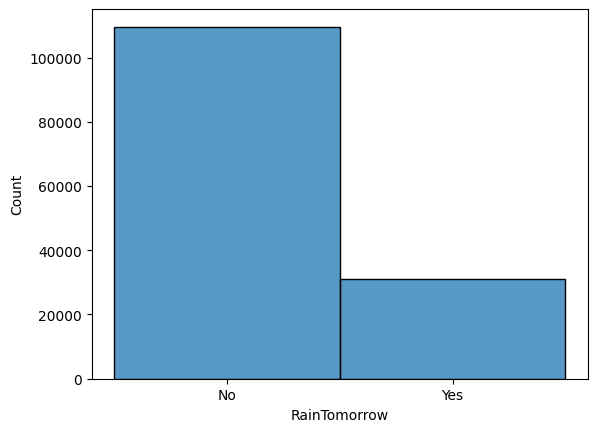

In [21]:
sns.histplot(x='RainTomorrow', data=df)

In [22]:
df.RainTomorrow.value_counts() / len(df) * 100

,count
RainTomorrow,
No,77.838153
Yes,22.161847


# Feature Engineering

In [23]:
# extracting Year Month Day from Date column
df.Date = pd.to_datetime(df.Date)
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140787 non-null  float64       
 3   MaxTemp        140787 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    140787 non-null  float64       
 6   Sunshine       140787 non-null  float64       
 7   WindGustDir    131624 non-null  object        
 8   WindGustSpeed  140787 non-null  float64       
 9   WindDir9am     131127 non-null  object        
 10  WindDir3pm     137117 non-null  object        
 11  WindSpeed9am   140787 non-null  float64       
 12  WindSpeed3pm   140787 non-null  float64       
 13  Humidity9am    140787 non-null  float64       
 14  Humidity3pm    140787 non-null  float64       
 15  Press

In [25]:
# Updating numeric columns list as new columns are made
num_cols = df.select_dtypes(np.number).columns.to_list()

In [26]:
#names of object type columns
cat_cols = df.select_dtypes('object').columns.to_list()

In [27]:
cat_cols

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [28]:
num_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [29]:
#removing unwanted Column name
cat_cols.remove('RainTomorrow')
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Scaling Numeric Columns

In [30]:
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(df[num_cols])

MinMaxScaler()

In [33]:
df[num_cols] = scaler.transform(df[num_cols])
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,140787,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,2013-03-31 12:35:10.183468288,0.487850,0.529964,0.006334,0.037741,0.526244,0.250553,0.133312,0.217561,0.642206,0.514493,0.614125,0.610527,0.492351,0.499917,0.510276,0.520023,0.575749,0.491226,0.490490
min,2007-11-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011-01-05 00:00:00,0.379717,0.429112,0.000000,0.027586,0.526244,0.186047,0.082155,0.149425,0.528625,0.370000,0.545455,0.542400,0.333333,0.444444,0.411392,0.424184,0.400000,0.181818,0.233333
50%,2013-05-27 00:00:00,0.483491,0.519849,0.000000,0.037741,0.526244,0.240310,0.126928,0.218391,0.649189,0.514493,0.614125,0.610527,0.492351,0.499917,0.506329,0.512476,0.600000,0.454545,0.500000
75%,2015-06-13 00:00:00,0.596698,0.623819,0.002156,0.037741,0.600000,0.310078,0.171701,0.275862,0.779027,0.650000,0.682645,0.676800,0.666667,0.666667,0.605485,0.608445,0.800000,0.727273,0.733333
max,2017-06-25 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.150784,0.134343,0.022817,0.021926,0.189061,0.112811,0.067069,0.103334,0.179765,0.205470,0.111557,0.106920,0.253806,0.234384,0.136727,0.131916,0.254227,0.311508,0.293296


# One Hot Encoding

In [34]:
df[cat_cols].isna().sum()

,0
Location,0
WindGustDir,9163
WindDir9am,9660
WindDir3pm,3670
RainToday,0


In [35]:
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [36]:
df[cat_cols].isna().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0


In [37]:
encoder = OneHotEncoder()
encoder.fit(df[cat_cols])

OneHotEncoder()

In [38]:
#Name of encoded columns
encoded_cols = list(encoder.get_feature_names_out())
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [40]:
encoded = encoder.transform(df[cat_cols])
encoded_data = pd.DataFrame(encoded.toarray(), columns=encoded_cols)
encoded_data.head()

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [45]:
print(len(df))
print(len(encoded_data))

140787
140787


# Preparing Data

In [46]:
df.reset_index(drop=True, inplace=True)
encoded_data.reset_index(drop=True, inplace=True)
x = pd.concat([df[num_cols], encoded_data], axis=1)
y = df['RainTomorrow']
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.179163,0.275862,0.658463,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.059768,0.252874,0.408062,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.171701,0.298851,0.352417,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.112003,0.103448,0.417336,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.082155,0.229885,0.760479,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,0.283019,0.502836,0.000000,0.037741,0.526244,0.193798,0.141852,0.149425,0.547174,0.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140783,0.266509,0.533081,0.000000,0.037741,0.526244,0.193798,0.126928,0.126437,0.472981,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140784,0.285377,0.568998,0.000000,0.037741,0.526244,0.124031,0.126928,0.103448,0.519351,0.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
140785,0.327830,0.599244,0.000000,0.037741,0.526244,0.240310,0.097079,0.103448,0.491529,0.24,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [48]:
from sklearn.model_selection import train_test_split

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.20, random_state=42, stratify =y)

In [51]:
print(xtrain.shape , ytrain.shape)
print(ytrain.value_counts())

(112629, 121) (112629,)
RainTomorrow
No     87668
Yes    24961
Name: count, dtype: int64


In [55]:
print(xtest.shape, ytest.shape)
print(ytest.value_counts())

(28158, 121) (28158,)
RainTomorrow
No     21918
Yes     6240
Name: count, dtype: int64


# Modelling

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()

In [58]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [59]:
model.score(xtrain , ytrain)

0.8501984391231387

In [60]:
yhat = model.predict(xtest)
y_prob = model.predict_proba(xtest)

# Evaluating

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report, roc_curve, f1_score

In [63]:
print(accuracy_score(ytest, yhat))
print(f1_score(ytest,yhat, pos_label='Yes'))

0.8522977484196321
0.6123590269363408


In [64]:
fpr,tpr,thresholds = roc_curve(ytest, y_prob[:,1], pos_label='Yes')

In [65]:
#finding best threshold value
best_id = np.argmax(tpr - fpr)
best_thresh = thresholds[best_id]
print(best_thresh)

0.23605889536930733


In [66]:
yhat_new = np.where(y_prob[:,1] > best_thresh, 'Yes', 'No')

In [67]:
print(accuracy_score(ytest, yhat_new))
print(f1_score(ytest,yhat_new, pos_label='Yes'))

0.8009801832516514
0.6292179436284239


Text(50.722222222222214, 0.5, 'Predictions')

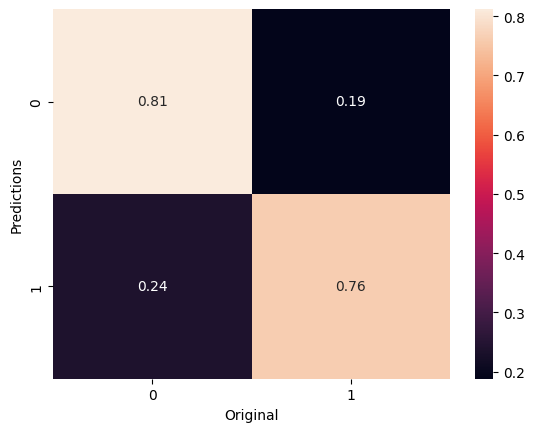

In [68]:
confuse = confusion_matrix(ytest, yhat_new, normalize='true')
sns.heatmap(confuse,  annot=True)
plt.xlabel('Original')
plt.ylabel('Predictions')

In [69]:
print(classification_report(ytest, yhat))

              precision    recall  f1-score   support

          No       0.88      0.95      0.91     21918
         Yes       0.73      0.53      0.61      6240

    accuracy                           0.85     28158
   macro avg       0.80      0.74      0.76     28158
weighted avg       0.84      0.85      0.84     28158



Checking Model with 'dumb' and 'random' model to check if our model learn something useful or it is just luck.

In [70]:
#random model
def randomg(args):
    return np.random.choice(['Yes','No'], len(args))
def all_no(args):
    return np.full(len(args), 'No')

In [71]:
print(accuracy_score(ytest, randomg(ytest)))
print(f1_score(ytest, randomg(ytest), pos_label='Yes'))

0.4975140279849421
0.3030184241473932


In [72]:
print(accuracy_score(ytest, all_no(ytest)))
print(f1_score(ytest, all_no(ytest), pos_label='Yes'))

0.778393351800554
0.0
